<a href="https://colab.research.google.com/github/sovank/DevOpsPortfolio/blob/main/Day_118_Kubernetes_Observability_and_Pod_Design.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Q1. Probes in Kubernetes

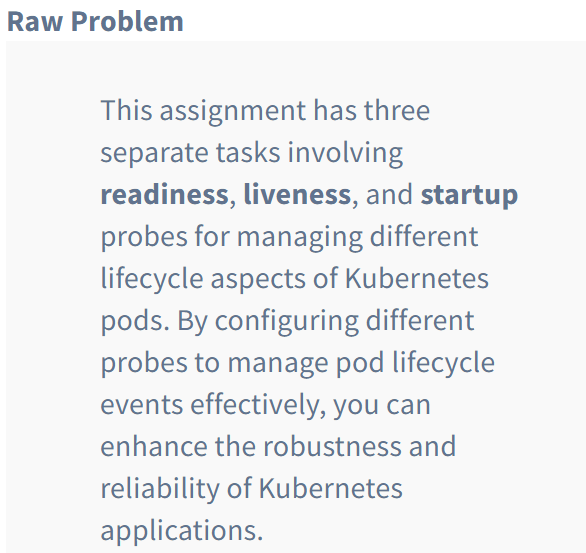

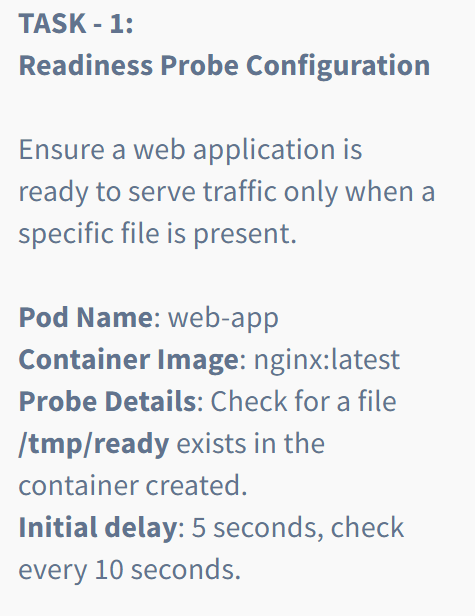

In [ ]:
# vi readiness.yml

kind: Pod
apiVersion: v1
metadata:
  name: web-app
spec:
  containers:
    - name: nginx
      image: nginx:latest
      readinessProbe:
        exex:
          command:
            - test
            - -f
            - /tmp/ready
        initialDelaySeconds: 5
        periodSeconds: 10

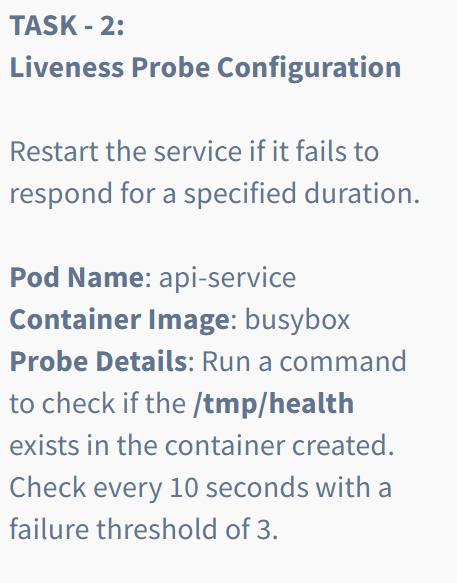

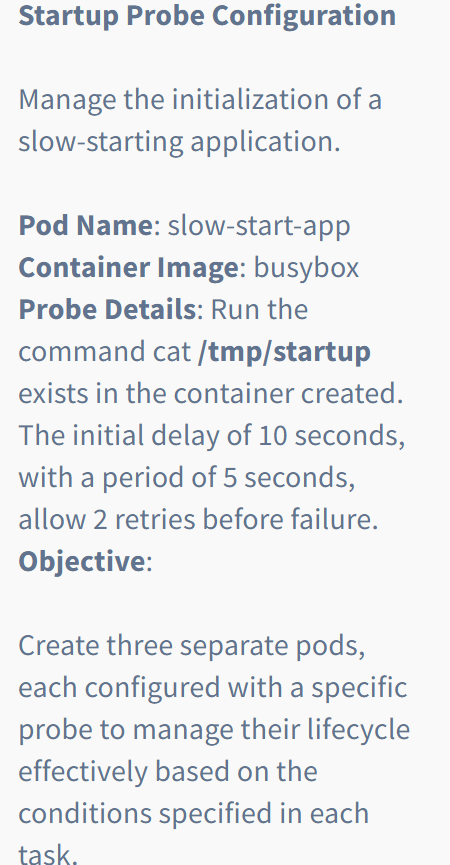

In [ ]:
kind: Pod
apiVersion: v1
metadata:
  name: web-app
  namespace: default
spec:
  containers:
    - name: web-app-container
      image: nginx:latest
      command: ["/bin/sh", "-c"]
      args:
        - |
          touch /tmp/ready;
          nginx -g 'daemon off;';
      ports:
        - containerPort: 80
      readinessProbe:
        exec:
          command:
            - test
            - -f
            - /tmp/ready
        initialDelaySeconds: 5
        periodSeconds: 10

---

kind: Pod
apiVersion: v1
metadata:
  name: api-service
  namespace: default
spec:
  containers:
    - name: api-service-container
      image: busybox
      command: ["/bin/sh", "-c"]
      args:
        - |
          touch /tmp/health;
          sleep 3600;
      livenessProbe:
        exec:
          command:
            - test
            - -f
            - /tmp/health
        initialDelaySeconds: 10
        periodSeconds: 10
        failureThreshold: 3

---

kind: Pod
apiVersion: v1
metadata:
  name: slow-start-app
  namespace: default
spec:
  containers:
    - name: slow-start-app-container
      image: busybox
      command: ["/bin/sh", "-c"]
      args:
        - |
          sleep 10;
          touch /tmp/startup;
          sleep 3600;
      startupProbe:
        exec:
          command:
            - cat
            - /tmp/startup
        initialDelaySeconds: 20
        periodSeconds: 5
        failureThreshold: 2
        timeoutSeconds: 5

In [ ]:
# k exec -it slow-start-app -c slow-start-app-container -- /bin/sh



---

\

# Q2. Deployment Strategy in Kubernetes

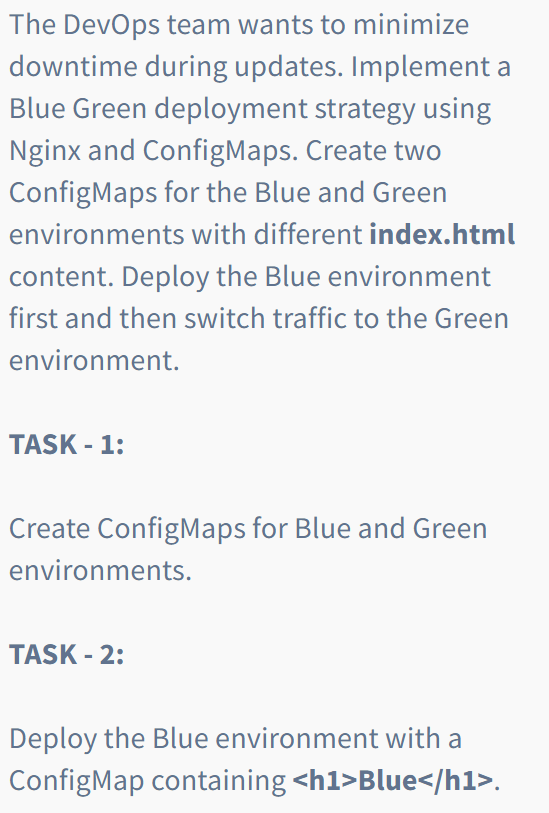

\

---



\

# Q10. Container Logs in Kubernetes

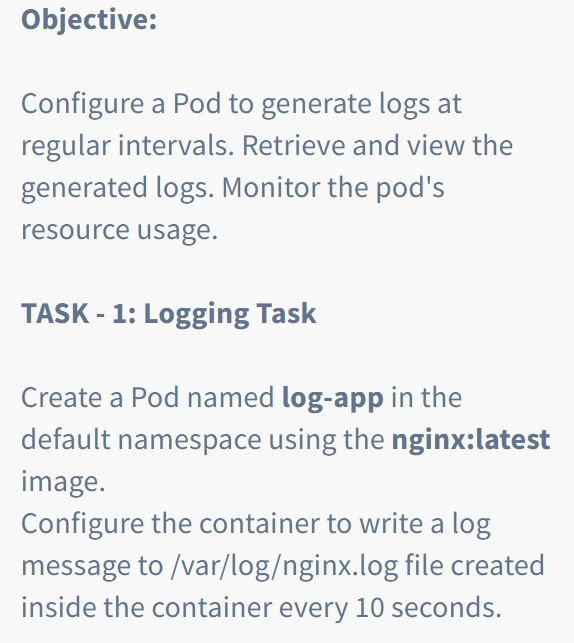

In [ ]:
kind: Pod
apiVersion: v1
metadata:
  name: log-app
  namespace: default
spec:
  containers:
    - name: log-app-container
      image: nginx:latest
      command: ["/bin/sh"]
      args: ['-c', 'while true; do echo "$(date) - Log message from nginx"; sleep 10; done']

# the below test case passes only with the container name nginx
apiVersion: v1
kind: Pod
metadata:
  name: log-app
  namespace: default
spec:
  containers:
  - name: nginx
    image: nginx:latest
    command: ["/bin/sh"]
    args: ['-c', 'while true; do echo "$(date) - Log message from nginx"; sleep 10; done']

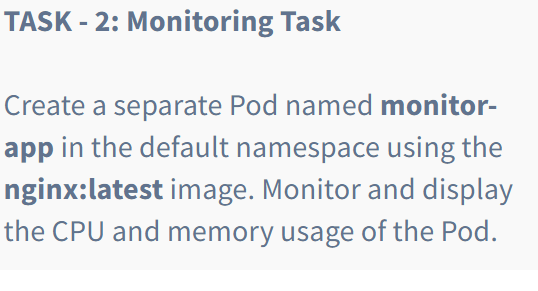

In [ ]:
kind: Pod
apiVersion: v1
metadata:
  name: log-app
  namespace: default
spec:
  containers:
    - name: log-app-container
      image: nginx:latest